In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('teleCust.csv')

print("Dataset loaded successfully!")
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist(), "\n")
print(df.head())

Dataset loaded successfully!
Dataset shape: (1000, 12)
Columns: ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat'] 

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


In [3]:
# Drop missing values (if any)
df = df.dropna()

# Encode categorical variables if present
# Detect categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nCategorical columns encoded:", list(cat_cols))


Categorical columns encoded: []


In [4]:
if 'custcat' in df.columns:
    y = df['custcat']
    X = df.drop('custcat', axis=1)
else:
    raise ValueError("Target column 'custcat' not found. Please check dataset column names.")

print("Features used for training:", X.columns.tolist())
print("Target variable:", 'custcat')


Features used for training: ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']
Target variable: custcat


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

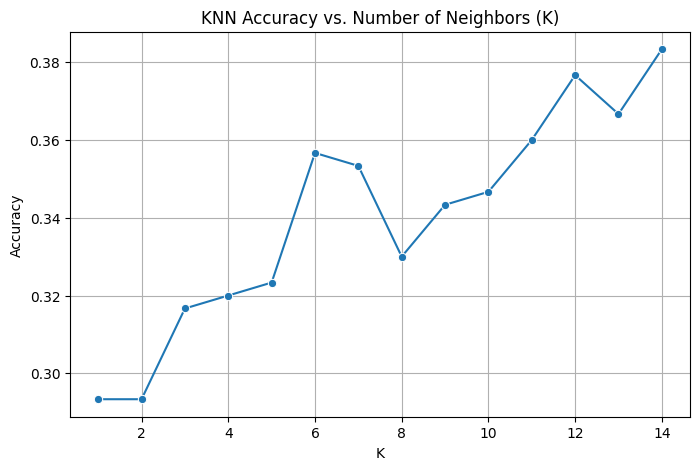


✅ Best K value: 14
✅ Highest Accuracy: 0.3833



In [7]:
k_values = range(1, 15)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs. K
plt.figure(figsize=(8, 5))
sns.lineplot(x=k_values, y=accuracy_scores, marker='o')
plt.title("KNN Accuracy vs. Number of Neighbors (K)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Choose best k
best_k = k_values[np.argmax(accuracy_scores)]
print(f"\n✅ Best K value: {best_k}")
print(f"✅ Highest Accuracy: {max(accuracy_scores):.4f}\n")


Final KNN Model Accuracy: 0.3833

Confusion Matrix:


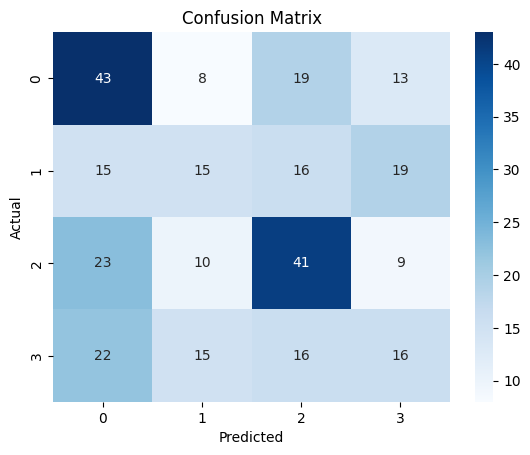


Classification Report:
              precision    recall  f1-score   support

           1       0.42      0.52      0.46        83
           2       0.31      0.23      0.27        65
           3       0.45      0.49      0.47        83
           4       0.28      0.23      0.25        69

    accuracy                           0.38       300
   macro avg       0.36      0.37      0.36       300
weighted avg       0.37      0.38      0.37       300



In [8]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred_final)
print(f"Final KNN Model Accuracy: {acc:.4f}\n")

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))